In [1]:
import tensorflow as tf
from tensorflow import keras

2024-03-10 15:44:40.944535: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 15:44:40.944786: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 15:44:40.947351: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-10 15:44:41.180062: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-10 15:44:44.829978: W tensorflow/compiler/

In [2]:
model = keras.models.load_model("Big_Model_30__0.874.h5")

2024-03-10 16:33:31.023154: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-10 16:33:32.747946: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-10 16:33:32.748000: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-10 16:33:32.953702: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-10 16:33:32.953832: I tensorflow/compile

In [4]:
!wget http://bit.ly/mlbookcamp-pants -O pants.jpg

--2024-03-10 02:29:35--  http://bit.ly/mlbookcamp-pants
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/alexeygrigorev/clothing-dataset-small/master/test/pants/4aabd82c-82e1-4181-a84d-d0c6e550d26d.jpg [following]
--2024-03-10 02:29:35--  https://raw.githubusercontent.com/alexeygrigorev/clothing-dataset-small/master/test/pants/4aabd82c-82e1-4181-a84d-d0c6e550d26d.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23048 (23K) [image/jpeg]
Saving to: ‘pants.jpg’

pants.jpg           100%[===================>]  22.51K  --.-KB/s    in 0.006s  

2024-03-10 02:29:36 (3.78 MB/s) - ‘pants.jp

In [3]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input
import numpy as np

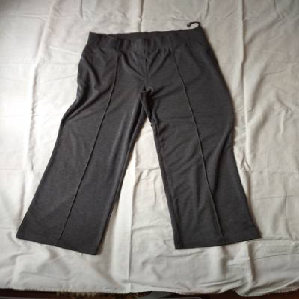

In [4]:
img = load_img("pants.jpg", target_size=(299, 299))
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)
img

In [7]:
X.shape

(1, 299, 299, 3)

In [5]:
preds = model.predict(X)

2024-03-10 16:34:08.855892: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2024-03-10 16:34:22.379076: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-10 16:34:46.734789: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 41s 41s/step


In [6]:
preds

array([[-3.3787415, -7.7895327, -2.1421611, -0.8105842, 11.158071 ,
        -4.8809714, -6.243516 ,  4.3918924, -3.0046647, -6.212968 ]],
      dtype=float32)

In [7]:
classes = [
'dress',
'hat',
'longsleeve',
'outwear',
'pants',
'shirt',
'shoes',
'shorts',
'skirt',
't-shirt'
]

In [8]:
dict(zip(classes, preds[0]))

{'dress': -3.3787415,
 'hat': -7.7895327,
 'longsleeve': -2.1421611,
 'outwear': -0.8105842,
 'pants': 11.158071,
 'shirt': -4.8809714,
 'shoes': -6.243516,
 'shorts': 4.3918924,
 'skirt': -3.0046647,
 't-shirt': -6.212968}

## Convert Keras to tf-lite

In [9]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tf_lite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tf_lite_model)

2024-03-10 16:38:09.850316: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 12582912 exceeds 10% of free system memory.


INFO:tensorflow:Assets written to: /tmp/tmpdrn0evrp/assets


INFO:tensorflow:Assets written to: /tmp/tmpdrn0evrp/assets
2024-03-10 16:38:16.442177: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 12582912 exceeds 10% of free system memory.
2024-03-10 16:38:16.935156: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-03-10 16:38:16.935223: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-03-10 16:38:16.941921: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpdrn0evrp
2024-03-10 16:38:16.959801: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-03-10 16:38:16.959879: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpdrn0evrp
2024-03-10 16:38:16.993183: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:382] MLIR V1 optimization pass is not enabled
2024-03-10 16:38:17.029270: I tensorflow/cc/saved_mod

In [10]:
import tensorflow.lite as tflite

interpreter = tflite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [11]:
input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [12]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()

tflite_preds = interpreter.get_tensor(output_index)
tflite_preds

array([[-3.3787427, -7.789536 , -2.1421602, -0.8105823, 11.158065 ,
        -4.880967 , -6.2435164,  4.3918943, -3.004664 , -6.2129664]],
      dtype=float32)

In [13]:
dict(zip(classes, tflite_preds[0]))

{'dress': -3.3787427,
 'hat': -7.789536,
 'longsleeve': -2.1421602,
 'outwear': -0.8105823,
 'pants': 11.158065,
 'shirt': -4.880967,
 'shoes': -6.2435164,
 'shorts': 4.3918943,
 'skirt': -3.004664,
 't-shirt': -6.2129664}